In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

C:\Users\khush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris=pd.read_csv(r"C:\Users\khush\Documents\Iris dataset\Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
iris.drop('Id',axis=1,inplace=True)
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


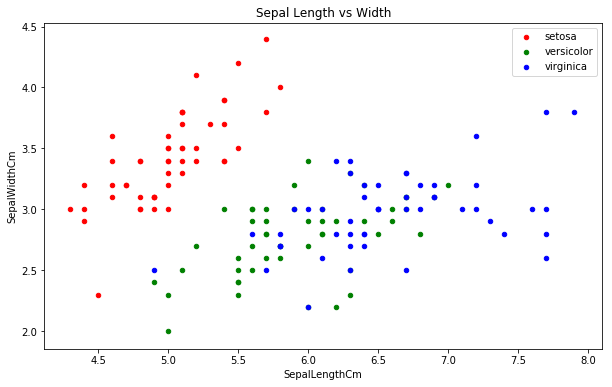

In [5]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='virginica',ax=fig)
fig.set_xlabel("SepalLengthCm")
fig.set_ylabel("SepalWidthCm")
fig.set_title("Sepal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

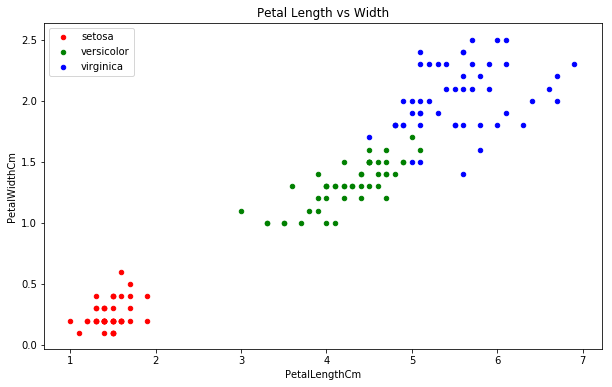

In [6]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red',label='setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='virginica',ax=fig)
fig.set_xlabel("PetalLengthCm")
fig.set_ylabel("PetalWidthCm")
fig.set_title("Petal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


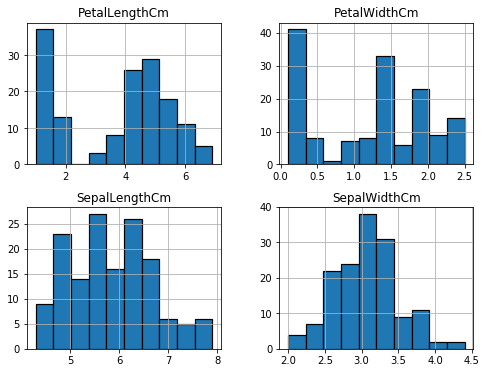

In [8]:
iris.hist(edgecolor='black',linewidth='1.2')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

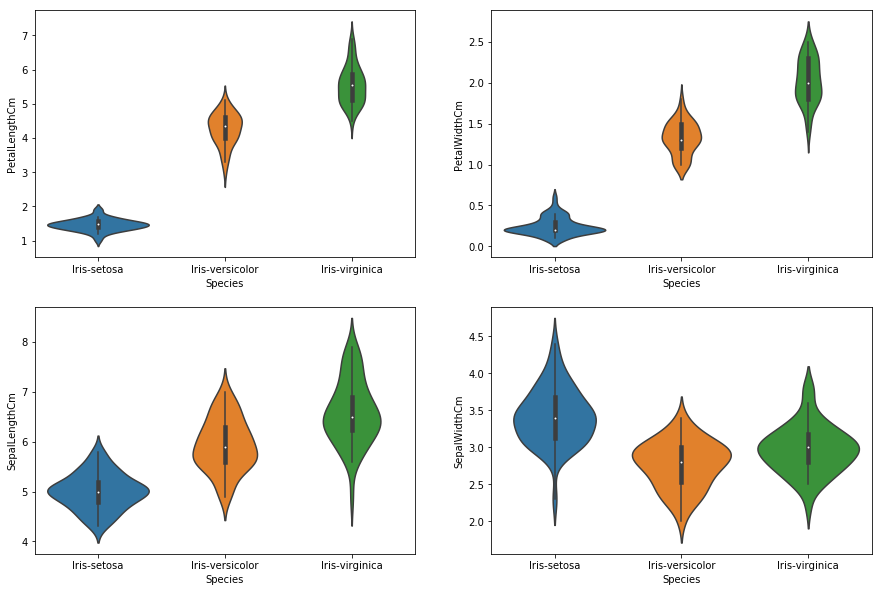

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [10]:
train, test = train_test_split(iris, test_size = 0.4)
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


In [11]:
train_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

test_x=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

acc_tab={}

In [12]:
model = svm.SVC() 
model.fit(train_x,train_y)
prediction=model.predict(test_x) 
acc=metrics.accuracy_score(prediction,test_y)*100
print('The accuracy of the SVM is:',acc)
acc_tab.update({'SVM': acc})

The accuracy of the SVM is: 98.33333333333333


In [13]:
model = LogisticRegression()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
acc=metrics.accuracy_score(prediction,test_y)*100
print('The accuracy of the Logistic Regression is',acc)
acc_tab.update({'Logistic Regression': acc})

The accuracy of the Logistic Regression is 95.0


In [14]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x,train_y)
prediction=model.predict(test_x)
acc=metrics.accuracy_score(prediction,test_y)*100
print('The accuracy of the KNN is',acc)
acc_tab.update({'KNN': acc})

The accuracy of the KNN is 95.0


In [15]:
model=RandomForestClassifier(n_estimators=10)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
acc=metrics.accuracy_score(prediction,test_y)*100
print('The accuracy of the RFC is',acc)
acc_tab.update({'RFC': acc})

The accuracy of the RFC is 95.0


In [16]:
print (acc_tab)

{'SVM': 98.33333333333333, 'Logistic Regression': 95.0, 'KNN': 95.0, 'RFC': 95.0}


In [17]:
sorted_acc_tab = sorted(acc_tab.items(), key=operator.itemgetter(1))
print(sorted_acc_tab)

[('Logistic Regression', 95.0), ('KNN', 95.0), ('RFC', 95.0), ('SVM', 98.33333333333333)]
